In [3]:
from dataset import *
import torch
import numpy as np
import os

In [20]:
# Hyperparameters.
seed = 0
batch_size = 1
num_slots = 10
num_iterations = 3
resolution = (128, 128)
frame = 8

ckpt_dir='/home/skyworker/result/4DGS_SlotAttention/slot_4dgs'
ckpt_seq = 'clevr'

val_dir = '/home/skyworker/result/4DGS_SlotAttention/shape_of_motion'
val_seq = 'movi_a_0009_anoMask'

In [21]:
from model import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resolution = (128, 128)
model = SlotAttentionAutoEncoder(resolution, num_slots, num_iterations, 64).to(device)
model.load_state_dict(torch.load(os.path.join(ckpt_dir,ckpt_seq,'10.ckpt') )['model_state_dict'])
test_set = PARTNET(os.path.join(val_dir,val_seq,'images'),'test')

In [22]:
model = model.to(device)
image = test_set[frame]['image']
image = image.unsqueeze(0).to(device)
recon_combined, recons, masks, slots = model(image)

image = image.squeeze(0)
recon_combined = recon_combined.squeeze(0)
recons = recons.squeeze(0)
masks = masks.squeeze(0)

image = image.permute(1,2,0).cpu().numpy()
recon_combined = recon_combined.permute(1,2,0)
recon_combined = recon_combined.cpu().detach().numpy()
recons = recons.cpu().detach().numpy()
masks = masks.cpu().detach().numpy()

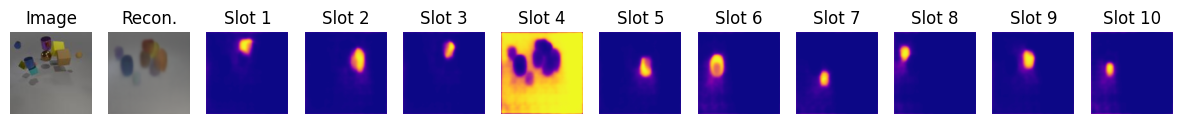

In [23]:
import matplotlib.pyplot as plt
from PIL import Image as Image, ImageEnhance
fig, ax = plt.subplots(1, num_slots + 2, figsize=(15, 2))
ax[0].imshow(image)
ax[0].set_title('Image')
ax[1].imshow(recon_combined)
ax[1].set_title('Recon.')
for i in range(num_slots):
  picture = masks[i]
  # picture = recons[i] * masks[i] + (1 - masks[i])
  ax[i + 2].imshow(picture, cmap='plasma')
  ax[i + 2].set_title('Slot %s' % str(i + 1))
for i in range(len(ax)):
  ax[i].grid(False)
  ax[i].axis('off')

# plt.imshow(masks[0])